In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


In [2]:
def get_accuracy(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    print(float(lines[-4].split()[1]))

get_accuracy("data/gru_50_50.log")
    

0.925561797752809


In [45]:
class GetMetrics:
    def __init__(self):
        self.types = ['gru', 'lstm', 'rnn_relu', 'rnn_sigmoid', 'rnn_tanh']
        self.first = np.arange(50, 501, 50)
        self.second = np.arange(50, 1001, 50)
        self.indices = {
            "Accuracy": -4,
            "F1 Score": -3,
            "Precision": -2,
            "Recall": -1
        }
        self.metric_dict_acc = {}
        self.metric_dict_f1 = {}
        self.metric_dict_prec = {}
        self.metric_dict_rec = {}

    def get_averages(self):
        acc_averages = {}
        f1_averages = {}
        prec_averages = {}
        rec_averages = {}
        denominator = len(self.first)*len(self.second)
        for type in self.types:
            acc_sum = 0
            f1_sum = 0
            prec_sum = 0
            rec_sum = 0
            for first in self.first:
                for second in self.second:
                    acc_sum += self.metric_dict_acc['data/{}_{}_{}.log'.format(type, first, second)]
                    f1_sum += self.metric_dict_f1['data/{}_{}_{}.log'.format(type, first, second)]
                    prec_sum += self.metric_dict_prec['data/{}_{}_{}.log'.format(type, first, second)]
                    prec_sum += self.metric_dict_rec['data/{}_{}_{}.log'.format(type, first, second)]
            acc_averages[type] = acc_sum/denominator
            f1_averages[type] = f1_sum/denominator
            prec_averages[type] = prec_sum/denominator
            rec_averages[type] = rec_sum/denominator
        print('The average accuracies for models are as follows')
        print(acc_averages)
        print('The average f1 scores for models are as follows')
        print(acc_averages)
        print('The average precision for models are as follows')
        print(acc_averages)
        print('The average recall for models are as follows')
        print(acc_averages)
        

    def get_metric_dicts(self):
        for type in self.types:
            for first in self.first:
                for second in self.second:
                    filename = 'data/{}_{}_{}.log'.format(type, first, second)
                    self.metric_dict_acc[filename] = self.get_measure(filename, -4)
                    self.metric_dict_f1[filename] = self.get_f1(filename)
                    self.metric_dict_prec[filename] = self.get_measure(filename, -2)
                    self.metric_dict_rec[filename] = self.get_measure(filename, -1)

    
            

    def get_measure(self, filename, metric_index):
        with open(filename, 'r') as file:
            lines = file.readlines()

        return float(lines[metric_index].split()[1])

    def get_color_map(self):
        #accuracy
        for type in self.types:
            x = []
            y = []
            c = []
            for first in self.first:
                for second in self.second:
                    x.append(first)
                    y.append(second)
                    c.append(self.metric_dict_acc['data/{}_{}_{}.log'.format(type, first, second)])
            plt.scatter(x=x,y=y,c=c,cmap='jet')
            plt.title("heatmap for {}".format(type))
            plt.colorbar()
            plt.show()
            plt.savefig('Images/HeatMaps/acc_{}.png'.format(type))
            plt.close

        #f1 scores
        for type in self.types:
            x = []
            y = []
            c = []
            for first in self.first:
                for second in self.second:
                    x.append(first)
                    y.append(second)
                    c.append(self.metric_dict_f1['data/{}_{}_{}.log'.format(type, first, second)])
            plt.scatter(x=x,y=y,c=c,cmap='jet')
            plt.title("heatmap for {}".format(type))
            plt.colorbar()
            plt.show()
            plt.savefig('Images/HeatMaps/f1_{}.png'.format(type))
            plt.close

        #precision
        for type in self.types:
            x = []
            y = []
            c = []
            for first in self.first:
                for second in self.second:
                    x.append(first)
                    y.append(second)
                    c.append(self.metric_dict_prec['data/{}_{}_{}.log'.format(type, first, second)])
            plt.scatter(x=x,y=y,c=c,cmap='jet')
            plt.title("heatmap for {}".format(type))
            plt.colorbar()
            plt.show()
            plt.savefig('Images/HeatMaps/prec_{}.png'.format(type))
            plt.close

        #recall
        for type in self.types:
            x = []
            y = []
            c = []
            for first in self.first:
                for second in self.second:
                    x.append(first)
                    y.append(second)
                    c.append(self.metric_dict_rec['data/{}_{}_{}.log'.format(type, first, second)])
            plt.scatter(x=x,y=y,c=c,cmap='jet')
            plt.title("heatmap for {}".format(type))
            plt.colorbar()
            plt.show()
            plt.savefig('Images/HeatMaps/rec_{}.png'.format(type))
            plt.close


    def get_f1(self, filename):
        with open(filename, 'r') as file:
            lines = file.readlines()

        return float(lines[-3].split()[2])
    
    

    

In [46]:
obj = GetMetrics()
obj.get_metric_dicts()

In [47]:
#obj.metric_dict_acc
obj.get_averages()

The average accuracies for models are as follows
{'gru': 0.985681179775278, 'lstm': 0.9797542134831434, 'rnn_relu': 0.9889044943820187, 'rnn_sigmoid': 0.9307724719101109, 'rnn_tanh': 0.9701123595505604}
The average f1 scores for models are as follows
{'gru': 0.985681179775278, 'lstm': 0.9797542134831434, 'rnn_relu': 0.9889044943820187, 'rnn_sigmoid': 0.9307724719101109, 'rnn_tanh': 0.9701123595505604}
The average precision for models are as follows
{'gru': 0.985681179775278, 'lstm': 0.9797542134831434, 'rnn_relu': 0.9889044943820187, 'rnn_sigmoid': 0.9307724719101109, 'rnn_tanh': 0.9701123595505604}
The average recall for models are as follows
{'gru': 0.985681179775278, 'lstm': 0.9797542134831434, 'rnn_relu': 0.9889044943820187, 'rnn_sigmoid': 0.9307724719101109, 'rnn_tanh': 0.9701123595505604}


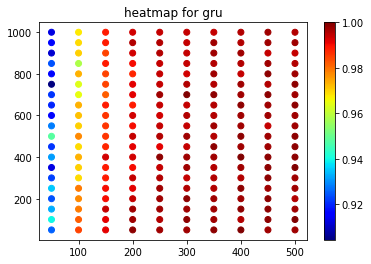

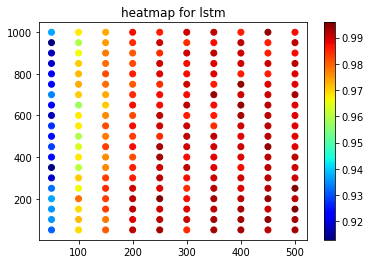

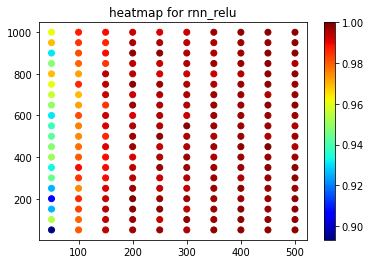

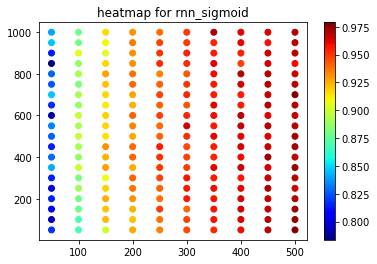

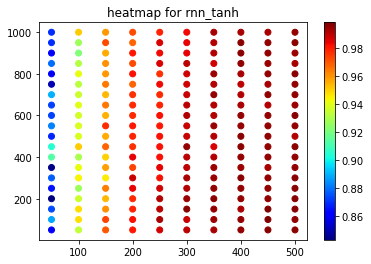

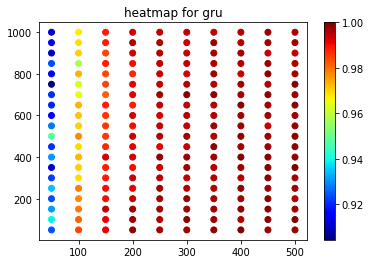

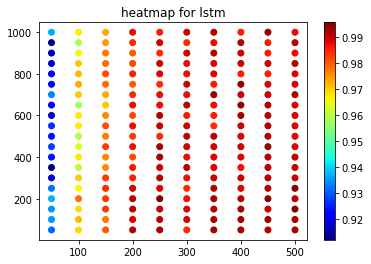

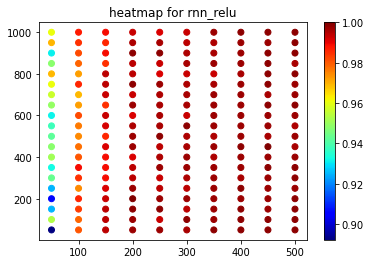

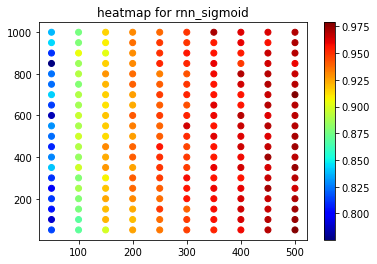

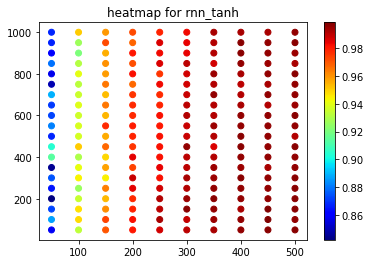

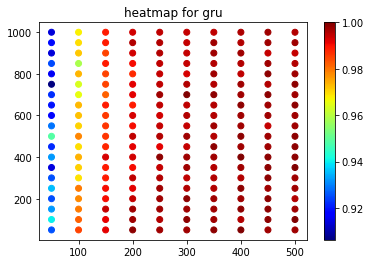

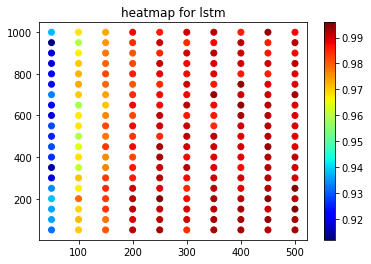

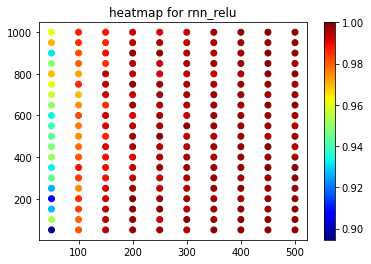

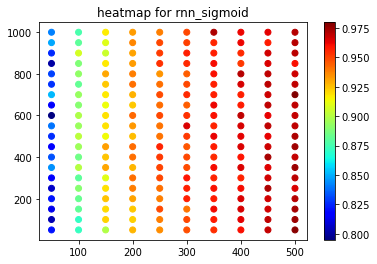

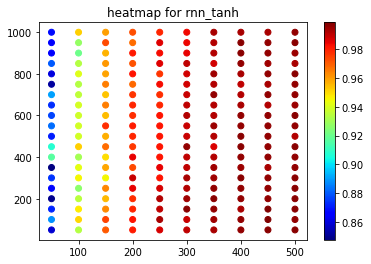

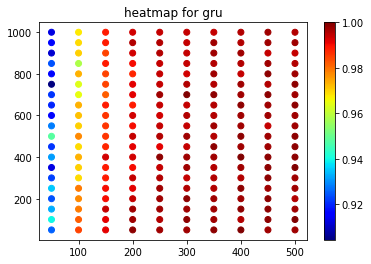

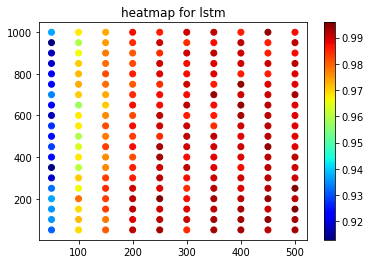

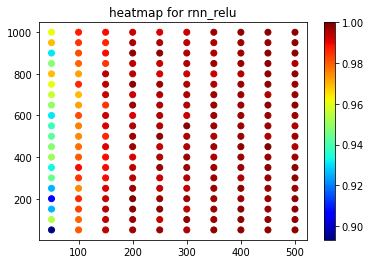

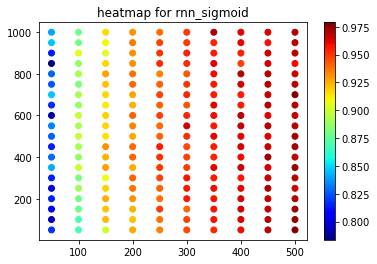

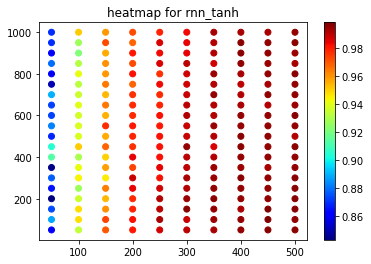

<Figure size 432x288 with 0 Axes>

In [48]:
obj.get_color_map()

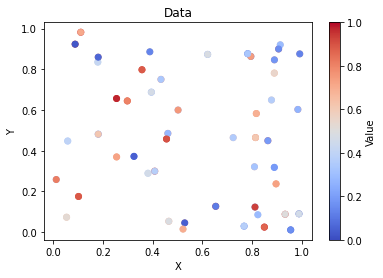

In [12]:
n = 50
x = np.random.rand(n)
y = np.random.rand(n)
first = np.random.rand(n)
second = np.random.rand(n)

# Create the color map
cmap = plt.cm.get_cmap('coolwarm')

# Plot the data
plt.scatter(x, y, c=first, cmap=cmap, vmin=0, vmax=1)
plt.scatter(x, y, c=second, cmap=cmap, vmin=0, vmax=1)

# Add a color bar
cb = plt.colorbar()
cb.set_label('Value')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data')

# Show the plot
plt.show()

In [27]:
dic = obj.metric_dict_acc
x,y,c= [],[],[]
for key in dic:
    spl = key[:-4].split("_")
    x_,y_ = int(spl[-2]),int(spl[-1])
    x.append(x_)
    y.append(y_)
    c.append(dic[key])

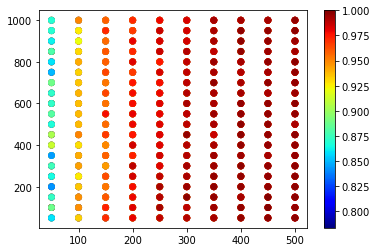

In [36]:
plt.scatter(x=x,y=y,c=c,cmap='jet')
plt.colorbar()
plt.show()

In [34]:
import pandas as pd
pd.Series(x).value_counts()

50     100
100    100
150    100
200    100
250    100
300    100
350    100
400    100
450    100
500    100
dtype: int64

In [35]:
pd.Series(y).value_counts()

50      50
100     50
950     50
900     50
850     50
800     50
750     50
700     50
650     50
600     50
550     50
500     50
450     50
400     50
350     50
300     50
250     50
200     50
150     50
1000    50
dtype: int64